In [10]:
import random
import simpy

class Task:
    def __init__(self, task_id, priority, service_intensity):
        self.task_id = task_id
        self.priority = priority
        self.service_intensity = service_intensity


def task_generator(env, arrival_intensities, task_queue, rejected_tasks):
    tasks = []
    for i in range(len(arrival_intensities)):
        tasks.append(Task(i + 1, i + 1, arrival_intensities[i]))
    
    while True:
        for task in tasks:
            if random.random() < task.service_intensity:
                if len(task_queue.items) < task_queue.capacity:
                    task_queue.put(task)
                    print(f"Task {task.task_id} arrived in the queue at {env.now} with priority {task.priority}")
                else:
                    rejected_tasks.append(task)
                    print(f"Queue overflow. Task {task.task_id} rejected at {env.now}")
        yield env.timeout(1)  # Pause for 1 unit of time


def cpu(env, cpu_intensities, task_queue, cpu_tasks_serviced):
    cpu_load = 0
    
    while True:
        if not task_queue.items:
            yield env.timeout(1)  # Pause for 1 unit of time
        else:
            highest_priority = min([task.priority for task in task_queue.items])
            # Get all tasks with the highest priority
            highest_priority_tasks = [task for task in task_queue.items if task.priority == highest_priority]

            task = random.choice(highest_priority_tasks)  # Randomly select a task with the highest priority
            service_time = random.expovariate(cpu_intensities[task.task_id - 1])
            yield env.timeout(service_time)
            
            if task in task_queue.items:
                task_queue.items.remove(task)
                cpu_load += service_time
                cpu_tasks_serviced.append(task)
                print(f"Task {task.task_id} serviced by CPU at {env.now}, service time: {service_time}")

def gpu(env, gpu_intensities, task_queue, gpu_tasks_serviced):
    gpu_load = 0
    
    while True:
        if not task_queue.items:
            yield env.timeout(1)  # Pause for 1 unit of time
        else:
            highest_priority = min([task.priority for task in task_queue.items])
            # Get all tasks with the highest priority
            highest_priority_tasks = [task for task in task_queue.items if task.priority == highest_priority]

            task = random.choice(highest_priority_tasks)  # Randomly select a task with the highest priority
            service_time = random.expovariate(gpu_intensities[task.task_id - 1])
            yield env.timeout(service_time)
            
            if task in task_queue.items:
                task_queue.items.remove(task)
                gpu_load += service_time
                gpu_tasks_serviced.append(task)
                print(f"Task {task.task_id} serviced by GPU at {env.now}, service time: {service_time}")
                
def simulate():
    arrival_intensities = [0.6, 0.7, 0.6, 0.3]
    cpu_intensities = [0.7, 0.5, 0.4, 0.3]
    gpu_intensities = [1.4, 1.2, 0.8, 0.4]
    total_time = 1000

    queue_capacity = 30
    env = simpy.Environment()
    task_queue = simpy.Store(env, capacity=queue_capacity)
    rejected_tasks = []
    cpu_tasks_serviced = []
    gpu_tasks_serviced = []

    env.process(task_generator(env, arrival_intensities, task_queue, rejected_tasks))
    env.process(cpu(env, cpu_intensities, task_queue, cpu_tasks_serviced))
    env.process(gpu(env, gpu_intensities, task_queue, gpu_tasks_serviced))

    env.run(until=total_time)

    # Counters
    rejected_count = len(rejected_tasks)
    cpu_serviced_count = len(cpu_tasks_serviced)
    gpu_serviced_count = len(gpu_tasks_serviced)
    
    # Calculate average queue length
    total_queue_length = sum([len(task_queue.items) for _ in range(total_time)])
    average_queue_length = total_queue_length / total_time

    return {
        'rejected_count': rejected_count,
        'cpu_serviced_count': cpu_serviced_count,
        'gpu_serviced_count': gpu_serviced_count,
        'average_queue_length': average_queue_length
    }

# results1 = []
# for _ in range(10):
#     results1.append(simulate())
# 
# #results = simulate()
# print(results1)

Task 1 arrived in the queue at 0 with priority 1
Task 2 arrived in the queue at 0 with priority 2
Task 3 arrived in the queue at 0 with priority 3
Task 1 serviced by GPU at 0.1028875462688737, service time: 0.1028875462688737
Task 1 arrived in the queue at 1 with priority 1
Task 2 arrived in the queue at 1 with priority 2
Task 2 serviced by CPU at 1.0665618169533093, service time: 0.9376426307534912
Task 1 serviced by CPU at 1.4882129369875225, service time: 0.4216511200342132
Task 1 arrived in the queue at 2 with priority 1
Task 2 arrived in the queue at 2 with priority 2
Task 3 arrived in the queue at 2 with priority 3
Task 4 arrived in the queue at 2 with priority 4
Task 2 serviced by CPU at 2.3908715768762097, service time: 0.9026586398886873
Task 1 arrived in the queue at 3 with priority 1
Task 2 arrived in the queue at 3 with priority 2
Task 1 serviced by CPU at 3.206324009368431, service time: 0.8154524324922213
Task 1 serviced by CPU at 3.4900051985092313, service time: 0.28368

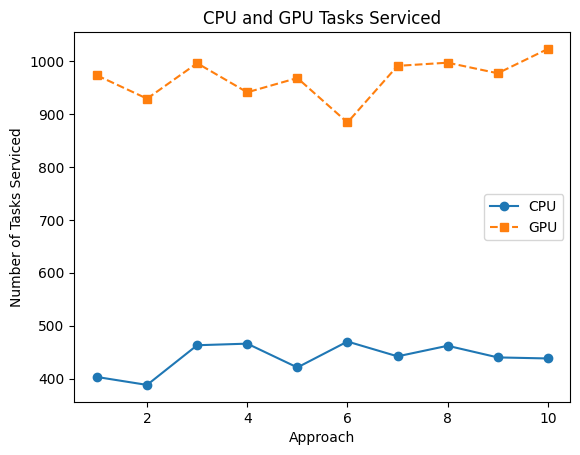

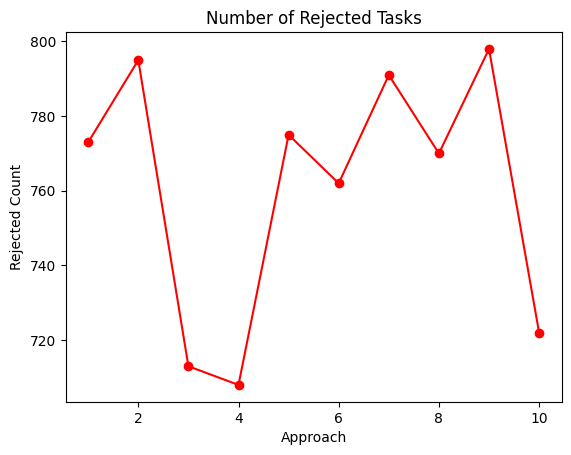

In [11]:
import matplotlib.pyplot as plt

# ... Your existing code ...

results = []
for _ in range(10):
    results.append(simulate())

# Extract data for plotting
cpu_serviced_counts = [result['cpu_serviced_count'] for result in results]
gpu_serviced_counts = [result['gpu_serviced_count'] for result in results]
rejected_counts = [result['rejected_count'] for result in results]
first_counts = [result['cpu_serviced_count'] + result['gpu_serviced_count'] for result in results]

# Plot 1: CPU and GPU tasks serviced
attempts = range(1, 11)  # Number of attempts
plt.plot(attempts, cpu_serviced_counts, marker='o', linestyle='-', label='CPU')
plt.plot(attempts, gpu_serviced_counts, marker='s', linestyle='--', label='GPU')
plt.xlabel('Approach')
plt.ylabel('Number of Tasks Serviced')
plt.title('CPU and GPU Tasks Serviced')
plt.legend()
plt.show()


# Plot 2: Rejected count
plt.plot(attempts, rejected_counts, marker='o', linestyle='-', color='r')
plt.xlabel('Approach')
plt.ylabel('Rejected Count')
plt.title('Number of Rejected Tasks')
plt.show()


In [13]:
#nichego.net
import random
import simpy

class Task:
    def __init__(self, task_id, service_intensity):
        self.task_id = task_id
        self.service_intensity = service_intensity


def task_generator(env, arrival_intensities, task_queue, rejected_tasks):
    tasks = []
    for i in range(len(arrival_intensities)):
        tasks.append(Task(i + 1, arrival_intensities[i]))
    
    while True:
        for task in tasks:
            if random.random() < task.service_intensity:
                if len(task_queue.items) < task_queue.capacity:
                    task_queue.put(task)
                    print(f"Task {task.task_id} arrived in the queue at {env.now}")
                else:
                    rejected_tasks.append(task)
                    print(f"Queue overflow. Task {task.task_id} rejected at {env.now}")
        yield env.timeout(1)  # Пауза в 1 единицу времени


def cpu(env, cpu_intensities, task_queue, cpu_tasks_serviced):
    cpu_load = 0
    
    while True:
        if not task_queue.items:
            yield env.timeout(1)  # Пауза в 1 единицу времени
            cpu_load -= 1
        else:
            current_task = (yield task_queue.get())
            service_time = random.expovariate(cpu_intensities[current_task.task_id - 1])
            yield env.timeout(service_time)
            
            cpu_load += service_time
            cpu_tasks_serviced.append(current_task)
            print(f"Task {current_task.task_id} servised by CPU at {env.now} , service time: {service_time}")


def gpu(env, gpu_intensities, task_queue, gpu_tasks_serviced):
    gpu_load = 0
    
    while True:
        if not task_queue.items:
            yield env.timeout(1)  # Пауза в 1 единицу времени
            gpu_load -= 1
        else:
            current_task = (yield task_queue.get())
            service_time = random.expovariate(gpu_intensities[current_task.task_id - 1])
            yield env.timeout(service_time)
            
            gpu_load += service_time
            gpu_tasks_serviced.append(current_task)
            print(f"Task {current_task.task_id} servised by GPU at{env.now}, service time:: {service_time}")

def simulate2():
    arrival_intensities = [0.6, 0.7, 0.6, 0.3]
    cpu_intensities = [0.7, 0.5, 0.4, 0.3]
    gpu_intensities = [1.4, 1.2, 0.8, 0.4]
    total_time = 1000

    queue_capacity = 30
    env = simpy.Environment()
    task_queue = simpy.Store(env, capacity=queue_capacity)
    rejected_tasks = []
    cpu_tasks_serviced = []
    gpu_tasks_serviced = []

    env.process(task_generator(env, arrival_intensities, task_queue, rejected_tasks))
    env.process(cpu(env, cpu_intensities, task_queue, cpu_tasks_serviced))
    env.process(gpu(env, gpu_intensities, task_queue, gpu_tasks_serviced))

    env.run(until=total_time)

    # Counters
    rejected_count = len(rejected_tasks)
    cpu_serviced_count = len(cpu_tasks_serviced)
    gpu_serviced_count = len(gpu_tasks_serviced)
    
    # Calculate average queue length
    total_queue_length = sum([len(task_queue.items) for _ in range(total_time)])
    average_queue_length = total_queue_length / total_time

    return {
        'rejected_count': rejected_count,
        'cpu_serviced_count': cpu_serviced_count,
        'gpu_serviced_count': gpu_serviced_count,
        'average_queue_length': average_queue_length
    }



Task 1 arrived in the queue at 0
Task 3 arrived in the queue at 0
Task 3 servised by GPU at0.7377056679935162, service time:: 0.7377056679935162
Task 1 arrived in the queue at 1
Task 2 arrived in the queue at 1
Task 1 servised by CPU at 1.9087115784849835 , service time: 1.9087115784849835
Task 1 arrived in the queue at 2
Task 2 arrived in the queue at 2
Task 3 arrived in the queue at 2
Task 1 arrived in the queue at 3
Task 2 arrived in the queue at 3
Task 3 arrived in the queue at 3
Task 1 servised by GPU at3.474035788755578, service time:: 1.7363301207620616
Task 2 servised by CPU at 3.6707989792292386 , service time: 1.7620874007442549
Task 1 arrived in the queue at 4
Task 2 arrived in the queue at 4
Task 1 arrived in the queue at 5
Task 2 arrived in the queue at 5
Task 3 arrived in the queue at 5
Task 1 servised by GPU at5.393483145096464, service time:: 1.9194473563408863
Task 2 servised by CPU at 5.615465842286703 , service time: 1.9446668630574648
Task 1 arrived in the queue at 

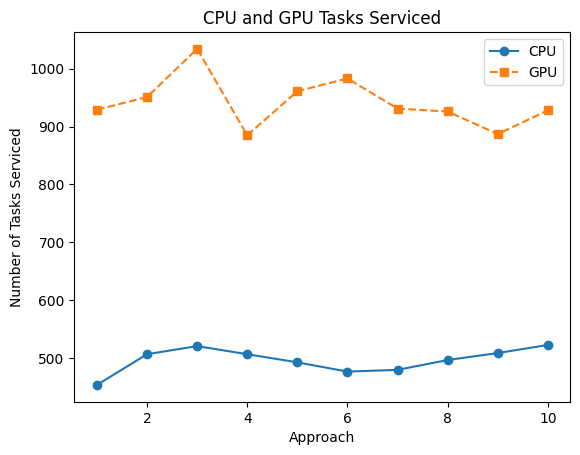

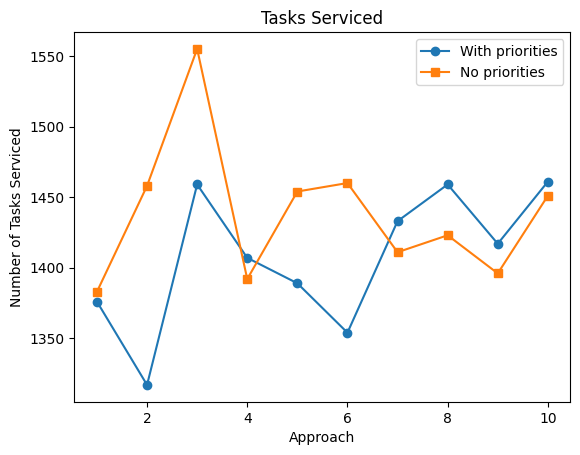

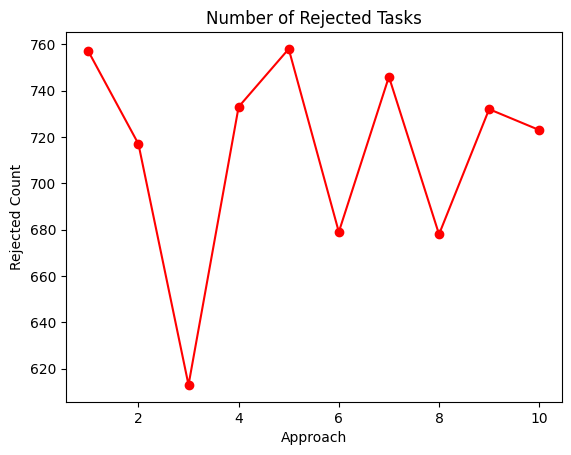

In [17]:
import matplotlib.pyplot as plt

# ... Your existing code ...

results2 = []
for _ in range(10):
    results2.append(simulate2())

# Extract data for plotting
cpu_serviced_counts = [result['cpu_serviced_count'] for result in results2]
gpu_serviced_counts = [result['gpu_serviced_count'] for result in results2]
rejected_counts = [result['rejected_count'] for result in results2]
sec_counts = [result['cpu_serviced_count']+result['gpu_serviced_count']  for result in results2]

# Plot 1: CPU and GPU tasks serviced
attempts = range(1, 11)  # Number of attempts
plt.plot(attempts, cpu_serviced_counts, marker='o', linestyle='-', label='CPU')
plt.plot(attempts, gpu_serviced_counts, marker='s', linestyle='--', label='GPU')
plt.xlabel('Approach')
plt.ylabel('Number of Tasks Serviced')
plt.title('CPU and GPU Tasks Serviced')
plt.legend()
plt.show()

# Plot 3: CPU and GPU tasks serviced
attempts = range(1, 11)  # Number of attempts
plt.plot(attempts, first_counts,marker='o',  label='With priorities')
plt.plot(attempts, sec_counts,marker='s',  label='No priorities')
plt.xlabel('Approach')
plt.ylabel('Number of Tasks Serviced')
plt.title('Tasks Serviced')
plt.legend()
plt.show()

# Plot 2: Rejected count
plt.plot(attempts, rejected_counts, marker='o', linestyle='-', color='r')
plt.xlabel('Approach')
plt.ylabel('Rejected Count')
plt.title('Number of Rejected Tasks')
plt.show()